# Plot individual differences in VTC topography and laterality, comparing within- vs. between-subject variability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
code_dir = '/home/nblauch/git/imaging_neuro'
sys.path.append(code_dir)
from func import SUBNUMS_PAPER
from func.utils import reject_df_outliers

## laterality

In [2]:
all_results = pd.read_csv(f'{code_dir}/data/inhouse_fmri_mv-True.tsv', sep='\t')
# comment out the next two lines to use all subjects
all_results = all_results[all_results['subnum'].isin(SUBNUMS_PAPER)] 
all_results = reject_df_outliers(all_results, m=3)
sub_inds = all_results.index.values

/home/nblauch/git/imaging_neuro/func/utils.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[is_outlier] = np.nan


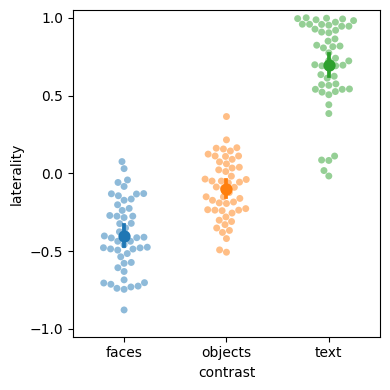

/tmp/ipykernel_16366/1690044658.py:31: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0].get_shared_y_axes().join(axs[0], axs[1])
/home/nblauch/anaconda3/envs/drive-suppress-brains/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


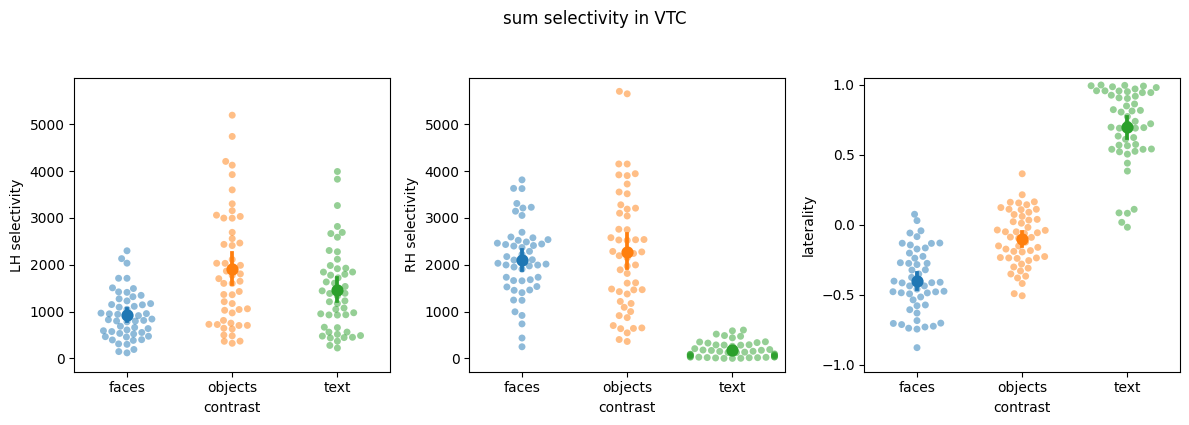

/home/nblauch/anaconda3/envs/drive-suppress-brains/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


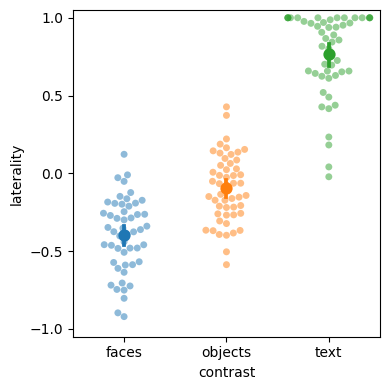

/tmp/ipykernel_16366/1690044658.py:31: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0].get_shared_y_axes().join(axs[0], axs[1])
/home/nblauch/anaconda3/envs/drive-suppress-brains/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nblauch/anaconda3/envs/drive-suppress-brains/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


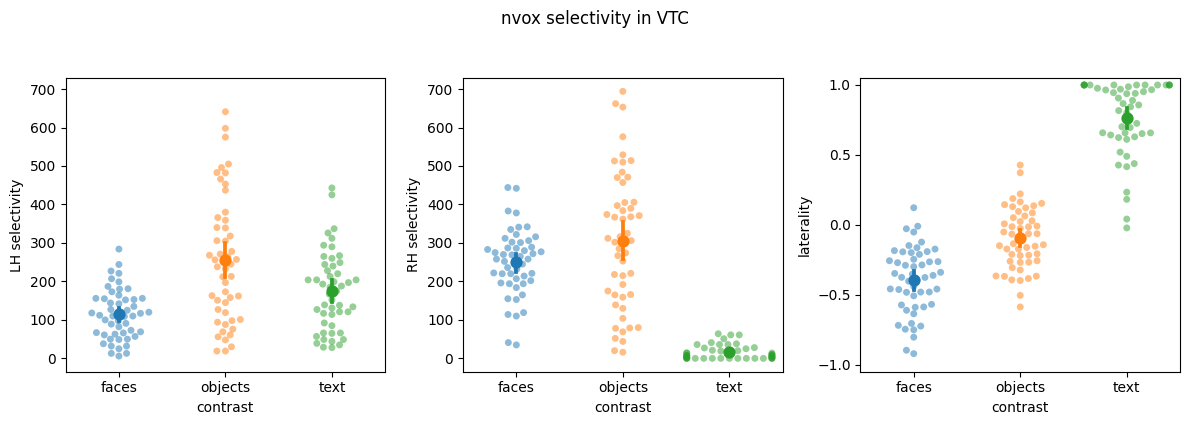

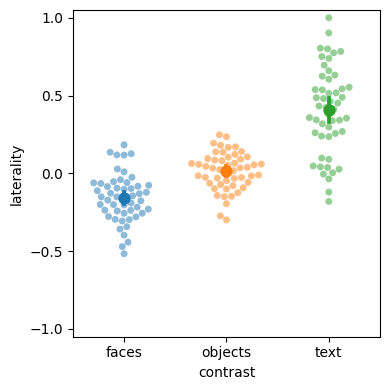

/tmp/ipykernel_16366/1690044658.py:31: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0].get_shared_y_axes().join(axs[0], axs[1])


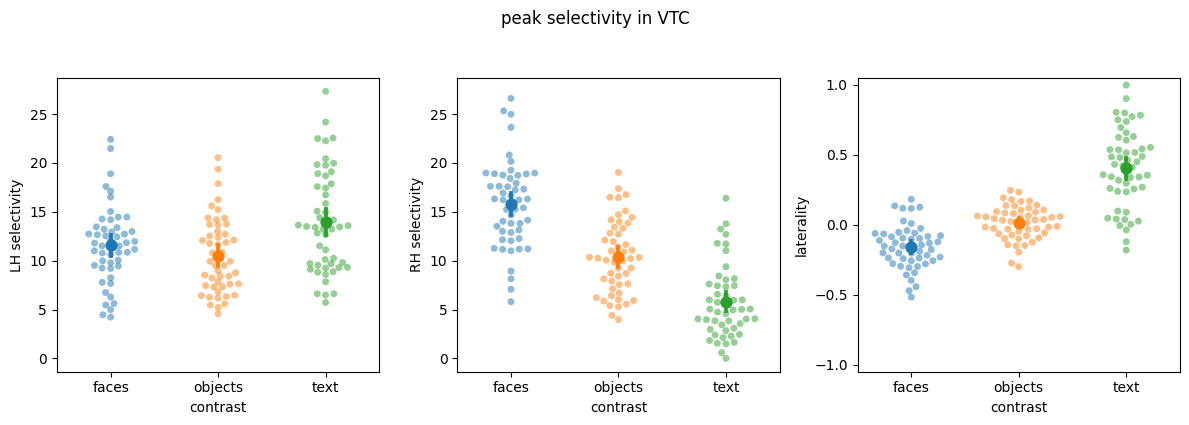

In [3]:
for roi in ['VTC']:
    for metric in ['sum', 'nvox', 'peak']:
        dat = {'contrast':[], 'laterality':[], 'RH selectivity':[], 'LH selectivity':[]}
        for sub in range(len(all_results)):
            for domain in ['faces', 'objects', 'text']:
                for baseline in ['others']:
                    if domain == 'language' and baseline == 'scramb':
                        continue
                    contrast = f'{domain}-vs-{baseline}' if baseline == 'scramb' else domain
                    dat['contrast'].append(contrast)
                    dat['laterality'].append(all_results[f'{roi}_{contrast}_{metric}_laterality'].iloc[sub])
                    dat['LH selectivity'].append(all_results[f'{roi}_{contrast}_{metric}_lh'].iloc[sub])
                    dat['RH selectivity'].append(all_results[f'{roi}_{contrast}_{metric}_rh'].iloc[sub])
        dat= pd.DataFrame(dat)

        fig, ax = plt.subplots(1,1,figsize=(4,4), sharey=False)
        for ii, meas in enumerate(['laterality']):
            if meas == 'laterality':
                ax.set_ylim(-1.05,1.05)
                ax.set_yticks([-1, -0.5, 0, 0.5, 1])
            sns.pointplot(data=dat, x='contrast', y=meas, hue='contrast', ax=ax, join=False)
            sns.swarmplot(data=dat, x='contrast', y=meas, hue='contrast', alpha=0.5, ax=ax)
            ax.set_ylabel(f'{meas}')
            ax.legend().remove()
        # plt.suptitle(f'{meas} of {metric} selectivity in {roi}', y=1.0)
        plt.tight_layout()
        plt.show()


        fig, axs = plt.subplots(1,3,figsize=(12,4), sharey=False)
        axs[0].get_shared_y_axes().join(axs[0], axs[1])
        for ii, meas in enumerate(['LH selectivity', 'RH selectivity', 'laterality']):
            if meas == 'laterality':
                axs[ii].set_ylim(-1.05,1.05)
                axs[ii].set_yticks([-1, -0.5, 0, 0.5, 1])
            sns.pointplot(data=dat, x='contrast', y=meas, hue='contrast', ax=axs[ii], join=False)
            sns.swarmplot(data=dat, x='contrast', y=meas, hue='contrast', alpha=0.5, ax=axs[ii])
            axs[ii].set_ylabel(f'{meas}')
            axs[ii].legend().remove()
        plt.suptitle(f'{metric} selectivity in {roi}', y=1.05)
        plt.tight_layout()
        plt.show()

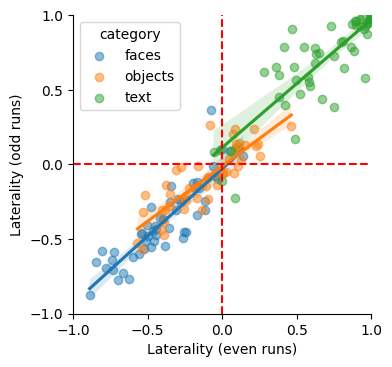

In [4]:
roi = 'VTC'
for metric in ['sum']:
    dat = {'contrast':[], 'even laterality':[], 'odd laterality':[]}
    for sub in range(len(all_results)):
        for domain in ['faces', 'objects', 'text']:
            for baseline in ['others']:
                if domain == 'language' and baseline == 'scramb':
                    continue
                contrast = f'{domain}-vs-{baseline}' if baseline == 'scramb' else domain
                dat['contrast'].append(contrast)
                dat['even laterality'].append(all_results[f'{roi}_{contrast}_{metric}_laterality_even'].iloc[sub])
                dat['odd laterality'].append(all_results[f'{roi}_{contrast}_{metric}_laterality_odd'].iloc[sub])
    dat= pd.DataFrame(dat)
    sns.lmplot(data=dat, x='even laterality', y='odd laterality', hue='contrast', height=4, scatter_kws={'alpha':0.5}, legend=False)
    plt.axhline(0, 0, 1, color='r', linestyle='--')
    plt.axvline(0, 0, 1, color='r', linestyle='--')
    plt.axis('square')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.yticks([-1, -.5, 0, .5, 1])
    plt.xlabel('Laterality (even runs)')
    plt.ylabel('Laterality (odd runs)')
    plt.legend(title='category', loc='upper left', bbox_to_anchor=[0,1])
    plt.show()

## within-hemisphere

In [5]:
sub_inds = all_results.index.values
all_subs_df = pd.read_csv(f'{code_dir}/data/vtc_ind_diffs.csv')
all_subs_df = all_subs_df[(all_subs_df['sub_1'].isin(sub_inds)) & (all_subs_df['sub_2'].isin(sub_inds))]

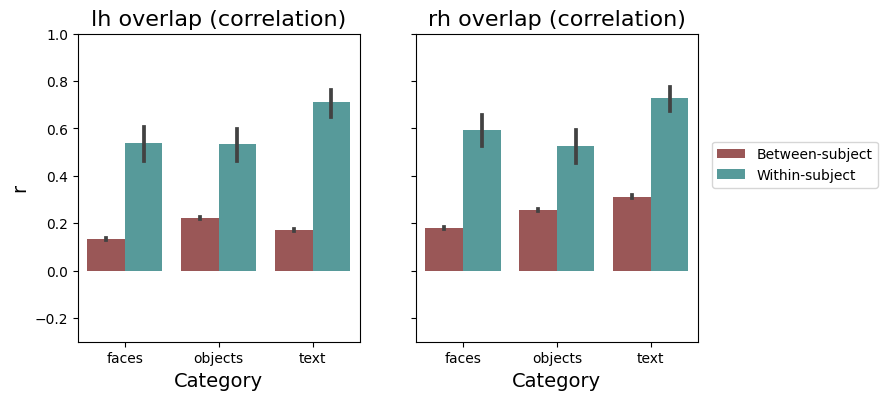

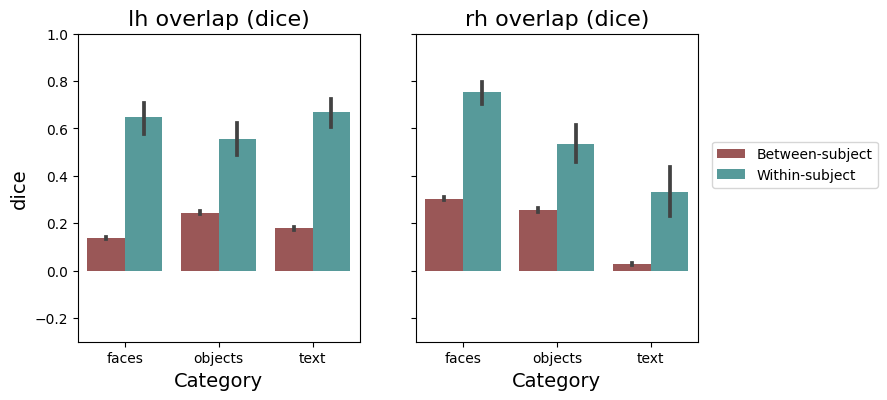

In [6]:
from func.utils import cleanup_legend
import matplotlib.pyplot as plt

for metric, name in zip(['r', 'dice'], ['correlation', 'dice']):
    fig, axs = plt.subplots(1, 2, figsize=(8,4), sharey=True)
    for ax, hemi in zip(axs, ['lh', 'rh']):
        sns.barplot(data=all_subs_df[all_subs_df.hemi == hemi], x='func_map', y=metric, hue='comparison', alpha=0.7, ax=ax, order=['faces', 'objects', 'text'], hue_order=['Between-subject', 'Within-subject'],
        palette = ['maroon', 'teal'],
        )
        if hemi == 'rh':
            cleanup_legend(ax, title='')
            ax.set_ylabel('')
        else:
            ax.legend().remove()
            ax.set_ylabel(metric, fontsize=14)
        ax.set_title(f'{hemi} overlap ({name})', fontsize=16)
        ax.set_xlabel('Category', fontsize=14)
        plt.ylim(-.3, 1)
    plt.show()